In [2]:
%load_ext autoreload
%autoreload 2
from utils import *
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
f = open("communities/graph_1", "rb")
G = pickle.load(f)
f.close()

In [21]:
f = open("communities/partition_1", "rb")
partition = pickle.load(f)
f.close()

In [22]:
f = open("communities/layout_1", "rb")
pos = pickle.load(f)
f.close()

In [23]:
f = open("communities/nb_tweets_per_user_1", "rb")
nb_tweets_per_user = pickle.load(f)
f.close()

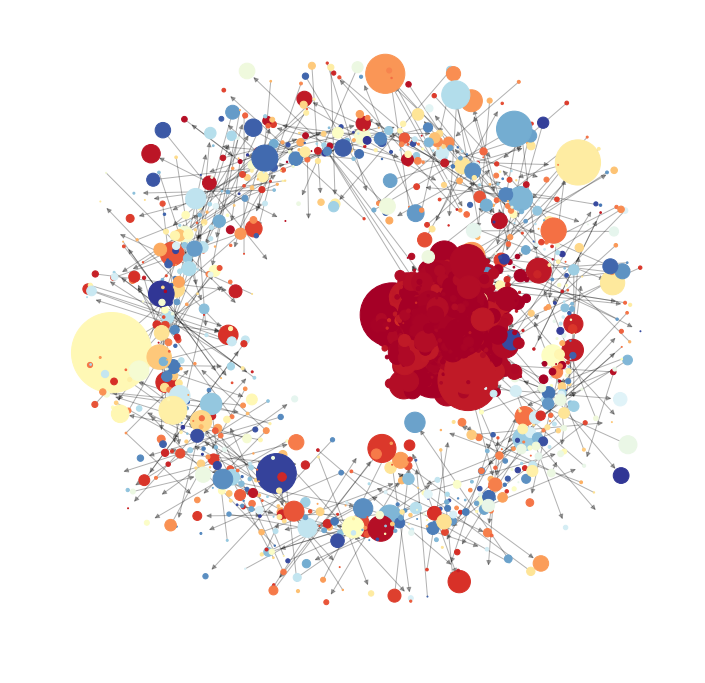

In [25]:
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=list(nb_tweets_per_user.values()),\
                       cmap=plt.cm.RdYlBu, node_color=[partition.get(node) for node in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.axis('off')
plt.show(G)

In [26]:
values = list(partition.values())
c = Counter(values)
groups_sorted = sorted(np.unique(values), key=c.get, reverse=True)

groups_counts = []
for group_id in groups_sorted:
    groups_counts.append((group_id, c[group_id]))
groups_counts = np.array(groups_counts)

groups_filtered = groups_counts[np.where(groups_counts[:,1] >= 100)]

partition_filtered = dict()
G_filtered = G.copy()
nb_tweets_per_user_filtered = dict()
for user_id, group in partition.items():
    if group in groups_filtered[:,0]:
        partition_filtered[user_id] = group
        nb_tweets_per_user_filtered[user_id] = nb_tweets_per_user[user_id]
    else:
        G_filtered.remove_node(user_id)
        
pos_filtered = community_layout(G_filtered, partition_filtered)    

In [31]:
len(np.unique(list(partition_filtered.values())))

12

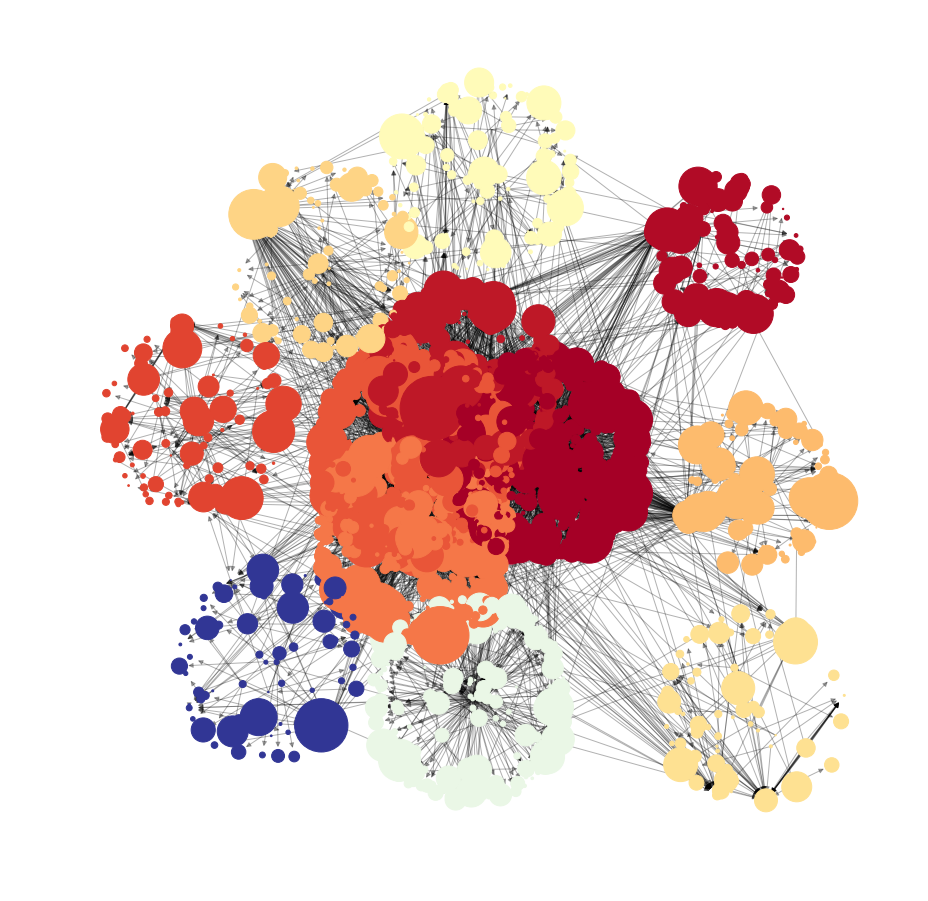

In [28]:
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=list(nb_tweets_per_user_filtered.values()),\
                       cmap=plt.cm.RdYlBu, node_color=[partition_filtered.get(node) for node in G_filtered.nodes()])
nx.draw_networkx_edges(G_filtered, pos_filtered, alpha=0.3)
plt.axis('off')
plt.show(G_filtered)